In [16]:
import sys
import os
import cv2 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import collections
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
import pickle
%matplotlib inline
pd.options.display.max_rows = 500

In [3]:
os.chdir(r'C:\Users\torej\Downloads\FASE1\FASE1\IMAGESnew')
df = pd.read_excel('dataset.xlsx')
os.chdir(r'C:\Users\torej\Downloads\FASE1\FASE1\IMAGESnew\IMAGES')
filenames = os.listdir()
#filenames.index('dataset.xlsx')
filenames

['c1anemia-108.jpg',
 'c1anemia-111.jpg',
 'c1anemia-112.jpg',
 'c1anemia-121.jpg',
 'c1anemia-122.jpg',
 'c1anemia-136.jpg',
 'c1anemia-155.jpg',
 'c1anemia-156.jpg',
 'c1anemia-160.jpg',
 'c1anemia-171.jpg',
 'c1anemia-198.jpg',
 'c1anemia-199.jpg',
 'c1anemia-200.jpg',
 'c1anemia-201.jpg',
 'c1anemia-212.jpg',
 'c1anemia-213.jpg',
 'c1anemia-214.jpg',
 'c1anemia-216.jpg',
 'c1anemia-217.jpg',
 'c1anemia-218.jpg',
 'c1anemia-219.jpg',
 'c1anemia-381.jpg',
 'c1anemia-382.jpg',
 'c1anemia-385.jpg',
 'c1anemia-395.jpg',
 'c1anemia-395_jpg.rf.6c982f52613ff776f29a6d8e8baa47b7.jpg',
 'c1anemia-395_jpg.rf.da4ee798e7581c292f42d00f70c6ec3b.jpg',
 'c1anemia-397.jpg',
 'c1anemia-402.jpg',
 'c1anemia-404.jpg',
 'c1anemia-405_jpg.rf.044223ac53e076ac855df98b5dbe3b34(1).jpg',
 'c1anemia-405_jpg.rf.044223ac53e076ac855df98b5dbe3b34.jpg',
 'c1anemia-405_jpg.rf.46db1ba44eb71cb6353592eda607e7fe(1).jpg',
 'c1anemia-405_jpg.rf.46db1ba44eb71cb6353592eda607e7fe.jpg',
 'c1anemia-405_jpg.rf.4e0c172e40c7196c42

In [4]:
dataframe = pd.DataFrame(filenames, columns=['File'])
filenames

['c1anemia-108.jpg',
 'c1anemia-111.jpg',
 'c1anemia-112.jpg',
 'c1anemia-121.jpg',
 'c1anemia-122.jpg',
 'c1anemia-136.jpg',
 'c1anemia-155.jpg',
 'c1anemia-156.jpg',
 'c1anemia-160.jpg',
 'c1anemia-171.jpg',
 'c1anemia-198.jpg',
 'c1anemia-199.jpg',
 'c1anemia-200.jpg',
 'c1anemia-201.jpg',
 'c1anemia-212.jpg',
 'c1anemia-213.jpg',
 'c1anemia-214.jpg',
 'c1anemia-216.jpg',
 'c1anemia-217.jpg',
 'c1anemia-218.jpg',
 'c1anemia-219.jpg',
 'c1anemia-381.jpg',
 'c1anemia-382.jpg',
 'c1anemia-385.jpg',
 'c1anemia-395.jpg',
 'c1anemia-395_jpg.rf.6c982f52613ff776f29a6d8e8baa47b7.jpg',
 'c1anemia-395_jpg.rf.da4ee798e7581c292f42d00f70c6ec3b.jpg',
 'c1anemia-397.jpg',
 'c1anemia-402.jpg',
 'c1anemia-404.jpg',
 'c1anemia-405_jpg.rf.044223ac53e076ac855df98b5dbe3b34(1).jpg',
 'c1anemia-405_jpg.rf.044223ac53e076ac855df98b5dbe3b34.jpg',
 'c1anemia-405_jpg.rf.46db1ba44eb71cb6353592eda607e7fe(1).jpg',
 'c1anemia-405_jpg.rf.46db1ba44eb71cb6353592eda607e7fe.jpg',
 'c1anemia-405_jpg.rf.4e0c172e40c7196c42

In [5]:
dataframe['Filename'] = dataframe.File.apply(lambda x: x.split('.')[0])

In [6]:
df['Filename'] = df.imagename.apply(lambda x: x.split('.')[0])
dataframe['Filename'] = dataframe['Filename'].apply(lambda x: x.split('_j')[0])

In [7]:
df = pd.merge(dataframe,df)
df.drop(columns=['Enumeracion ', 'imagename'], inplace=True)

In [8]:
image = cv2.imread('c1anemia-396.jpg')
r,b,g = cv2.split(image)
meanR = r.sum()/np.count_nonzero(r)
meanG = g.sum()/np.count_nonzero(g)
#print(r.sum()/np.count_nonzero(r), g.sum()/np.count_nonzero(g), b.sum()/np.count_nonzero(b))
print( 'mean of Red ', meanR)
print( 'mean of Green ', meanG)
print('Coeficient: ',np.log10(meanR)-np.log10(meanG))
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print("gris media: ", gray.sum() / np.count_nonzero(gray))
plt.imshow(b, cmap='gray', vmin=0, vmax=255);
h_1 = cv2.calcHist([gray], [0], None, [256], [0, 255])
# Eliminar zonas negras
h_1[0][0] = 0
#print(sum(h_1))
# Normalizar
h_1 = h_1 / sum(h_1)


# Vector con niveles de gris normalizado
gris = np.arange(256) / 255
h_11 = np.zeros(256)
moments = np.zeros(6)
for i in range(256):
    h_11[i] = h_1[i][0]

moments[0] = sum(h_11 * gris)

for j in range(1, 6):
    moments[j] = sum(((gris - moments[0]) ** (j + 1)) * h_11)

moments = moments * 256
moments[1] = (moments[1] * 256) ** (0.5)
R = 1 - (1 / (1 + (moments[2] / (256))))
print('Intensidad promedio =',moments[0])
print('Desviación estándar =',moments[1])
print('Suavidad =',R)
print('Asimetría =',moments[3])
print('Uniformidad =',moments[4])
print('Entropía =',moments[5])

ValueError: not enough values to unpack (expected 3, got 0)

In [9]:
df

,File,Filename,Anemia
0,c1anemia-108.jpg,c1anemia-108,Sin Anemia
1,c1anemia-111.jpg,c1anemia-111,Anemia
2,c1anemia-112.jpg,c1anemia-112,Anemia
3,c1anemia-121.jpg,c1anemia-121,Anemia
4,c1anemia-122.jpg,c1anemia-122,Sin Anemia
5,c1anemia-136.jpg,c1anemia-136,Sin Anemia
6,c1anemia-155.jpg,c1anemia-155,Sin Anemia
7,c1anemia-156.jpg,c1anemia-156,Sin Anemia
8,c1anemia-160.jpg,c1anemia-160,Sin Anemia
9,c1anemia-171.jpg,c1anemia-171,Sin Anemia


In [10]:
eritemia = []
means = []
grays = []
for index, file in enumerate(df['File']):
    print('read the file: ',file)
    image = cv2.imread(file)
    r,g,b = cv2.split(image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    meanR = r.sum()/np.count_nonzero(r)
    meanG = g.sum()/np.count_nonzero(g)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    grays.append(gray.sum() / np.count_nonzero(gray))
    #print("gris media: ", gray.sum() / np.count_nonzero(gray))
    eritemia.append(np.log10(meanR)-np.log10(meanG))
    #plt.imshow(b, cmap='gray', vmin=0, vmax=255);
    h_1 = cv2.calcHist([gray], [0], None, [256], [0, 255])
    # Eliminar zonas negras
    h_1[0][0] = 0
    #print(sum(h_1))
    # Normalizar
    h_1 = h_1 / sum(h_1)
    # Vector con niveles de gris normalizado
    gris = np.arange(256) / 255
    h_11 = np.zeros(256)
    moments = np.zeros(6)
    for i in range(256):
        h_11[i] = h_1[i][0]

    moments[0] = sum(h_11 * gris)

    for j in range(1, 6):
        moments[j] = sum(((gris - moments[0]) ** (j + 1)) * h_11)

    moments = moments * 256
    moments[1] = (moments[1] * 256) ** (0.5)
    R = 1 - (1 / (1 + (moments[2] / (256))))
    means.append(moments[0])
    #print('Intensidad promedio =',moments[0])
    #print('Desviación estándar =',moments[1])
    #print('Suavidad =',R)
    #print('Asimetría =',moments[3])
    #print('Uniformidad =',moments[4])
    #print('Entropía =',moments[5])

df['Eritemia'] = eritemia
df['means'] = means
df['meansJJ'] = grays

read the file:  c1anemia-108.jpg
read the file:  c1anemia-111.jpg
read the file:  c1anemia-112.jpg
read the file:  c1anemia-121.jpg
read the file:  c1anemia-122.jpg
read the file:  c1anemia-136.jpg
read the file:  c1anemia-155.jpg
read the file:  c1anemia-156.jpg
read the file:  c1anemia-160.jpg
read the file:  c1anemia-171.jpg
read the file:  c1anemia-198.jpg
read the file:  c1anemia-199.jpg
read the file:  c1anemia-200.jpg
read the file:  c1anemia-201.jpg
read the file:  c1anemia-212.jpg
read the file:  c1anemia-213.jpg
read the file:  c1anemia-214.jpg
read the file:  c1anemia-216.jpg
read the file:  c1anemia-217.jpg
read the file:  c1anemia-218.jpg
read the file:  c1anemia-219.jpg
read the file:  c1anemia-381.jpg
read the file:  c1anemia-382.jpg
read the file:  c1anemia-385.jpg
read the file:  c1anemia-395.jpg
read the file:  c1anemia-395_jpg.rf.6c982f52613ff776f29a6d8e8baa47b7.jpg
read the file:  c1anemia-395_jpg.rf.da4ee798e7581c292f42d00f70c6ec3b.jpg
read the file:  c1anemia-397.

In [11]:
df['Anemia?'] = df.replace(['Sin Anemia ', 'Anemia ', 'Anemia'], [0,1,1])['Anemia ']
df

,File,Filename,Anemia,Eritemia,means,meansJJ,Anemia?
0,c1anemia-108.jpg,c1anemia-108,Sin Anemia,0.068622,134.334543,133.812518,0
1,c1anemia-111.jpg,c1anemia-111,Anemia,0.124552,73.636937,73.349293,1
2,c1anemia-112.jpg,c1anemia-112,Anemia,0.161629,104.947201,104.537251,1
3,c1anemia-121.jpg,c1anemia-121,Anemia,0.024096,124.629326,124.142493,1
4,c1anemia-122.jpg,c1anemia-122,Sin Anemia,0.218027,61.282964,61.043577,0
5,c1anemia-136.jpg,c1anemia-136,Sin Anemia,0.238520,87.793296,87.450354,0
6,c1anemia-155.jpg,c1anemia-155,Sin Anemia,0.179771,102.481591,102.083890,0
7,c1anemia-156.jpg,c1anemia-156,Sin Anemia,0.365477,54.907730,54.693246,0
8,c1anemia-160.jpg,c1anemia-160,Sin Anemia,0.092009,122.170749,121.695948,0
9,c1anemia-171.jpg,c1anemia-171,Sin Anemia,0.073184,137.235830,136.701297,0


In [12]:
def analisis(real:np.ndarray,prediccion:np.ndarray,titulo=""):
        M =confusion_matrix(real,prediccion)
        M=pd.DataFrame(M)
        M.columns.name=('V Estimado')
        M.index.name=('V Real')
        print(M)
        accuracy=accuracy_score(real, prediccion) 
        #report= classification_report(real, prediccion) 
        print("accuracy:{}".format(accuracy))
        M =confusion_matrix(real,prediccion)
        fig, ax = plot_confusion_matrix(conf_mat=M,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
        if titulo !="":
          plt.title("{}".format(titulo))
        plt.show()

In [18]:
X_test

,means,Eritemia
146,87.269342,0.210437
89,118.178860,0.096367
106,71.768339,0.336262
7,54.907730,0.365477
94,83.769125,0.348878
56,129.212011,0.086602
136,117.271349,0.154498
45,100.454323,0.140771
26,146.313544,0.078311
44,97.372916,0.248791


V Estimado   0  1
V Real           
0           36  0
1           19  0
accuracy:0.6545454545454545


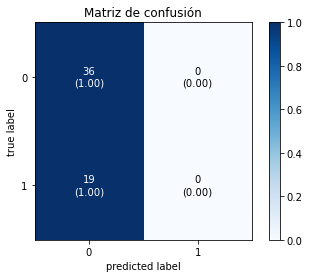

Recall: 0.500000
Accuracy: 0.654545
Precision: 0.327273
F1 score: 0.395604


C:\Users\torej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:

X_train, X_test, y_train, y_test = train_test_split(df[['means','Eritemia']], df['Anemia?'], test_size=0.33, random_state=0)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
confusion_matrix(y_test, predictions)

analisis(y_test, predictions,"Matriz de confusión")

# recall: tp / (tp + fn)
Recall= recall_score(y_test, predictions, average='macro')
print('Recall: %f' % Recall)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions, average='macro')
print('Precision: %f' % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions, average='macro')
print('F1 score: %f' % f1)

In [17]:
modelname = 'logisticModel'
pickle.dump(logmodel,open(modelname,'wb'))

In [22]:
np.reshape([1,2],(2,1))

array([[1],
       [2]])

In [31]:
dicnt = {0:'Sin anemia', 1:'Con anemia'}
valia=[0]
dicnt[valia[0]]

'Sin anemia'